In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('./anime_cleaned.csv')
df = df.sort_values(by=['aired_from_year'])

df = df.drop(columns=['title_synonyms', 'image_url', 'episodes', 'status', 'rating', 'duration', 
                 'broadcast', 'related', 'producer', 'airing', 'aired', 'aired_string', 
                 'licensor', 'members', 'favorites', 'premiered'])

# Anime Ratings - By Source
## Purpose
So I've always been curious about the ratings of anime depending on source. As a predominantly light novel reader to anime reader, I wondered to myself: ~~"are my tastes indeed superior to these plebians"~~ "What has consistently good source material that I can trust?"

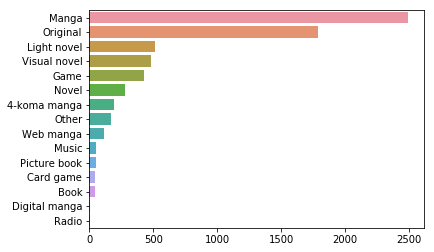

In [3]:
# Let's start with the genres

df.sort_values(by=['aired_from_year', 'source'])
source = df['source'].value_counts()
fig = plt.figure()
ax = fig.add_subplot(111)

sns.barplot(x=source.values, y=source.index, orient="h")

## Let's Graph It!
Surely, nothing can go wrong!

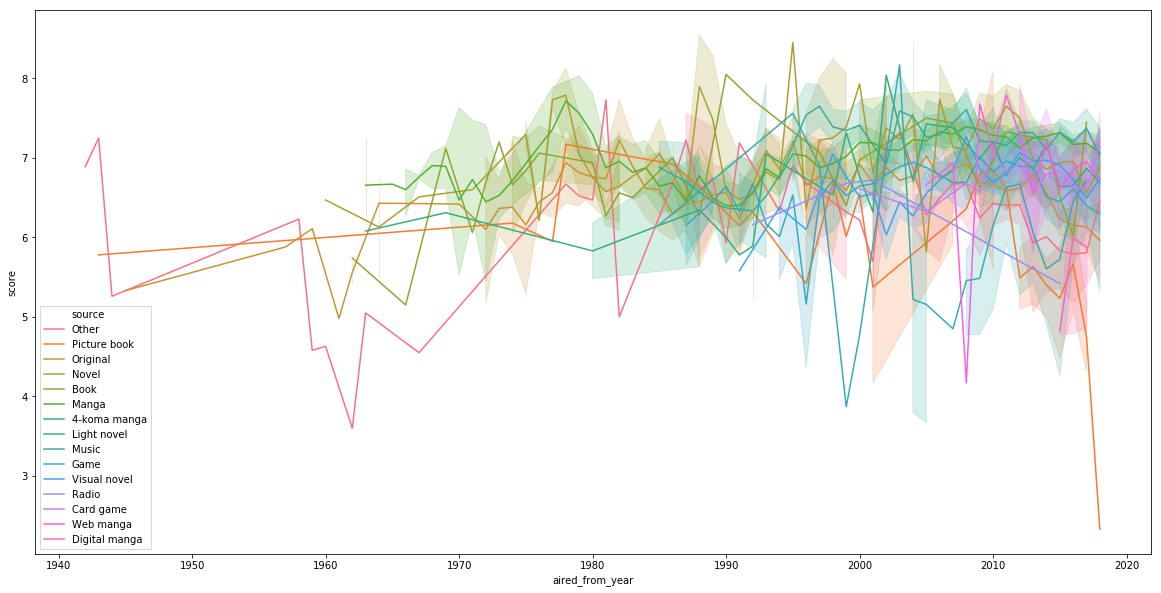

In [4]:
plt.figure(figsize=(20,10))
ax = sns.lineplot(x="aired_from_year", y="score", hue="source", data=df)

# I have made a dire mistake

## Cleaning
So first let's actually decide to combine a few bits and pieces. As you notice, we actually have a fair bit of repeats with mangas, and we have a few sources that aren't quite... significant.

We're going to combine Picture Book, Music, Radio, and Card Games into 'Other', putting all of the manga into 'Manga', and adding 'Novels' into 'Book

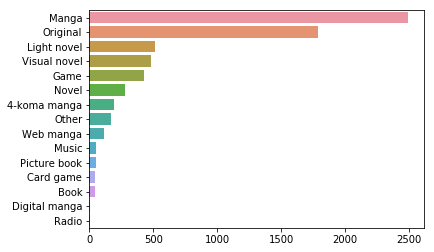

In [5]:
sns.barplot(x=source.values, y=source.index, orient="h")

In [6]:
def clean_source(data):
    # One way mapping
    mapping = {'Picture book': 'Other', 'Novel': 'Book', '4-koma manga': 'Manga',  'Music': 'Other', 
               'Radio': 'Other', 'Card game': 'Other', 'Web manga': 'Manga', 
               'Digital Manga': 'Manga', 'Digital manga': 'Manga'}
    if data in mapping:
        return mapping[data]
    else:
        return data
    

df['source'] = df['source'].apply(clean_source)
df['source'].unique()

array(['Other', 'Original', 'Book', 'Manga', 'Light novel', 'Game',
       'Visual novel'], dtype=object)

### Results
Now let's see how it looks.

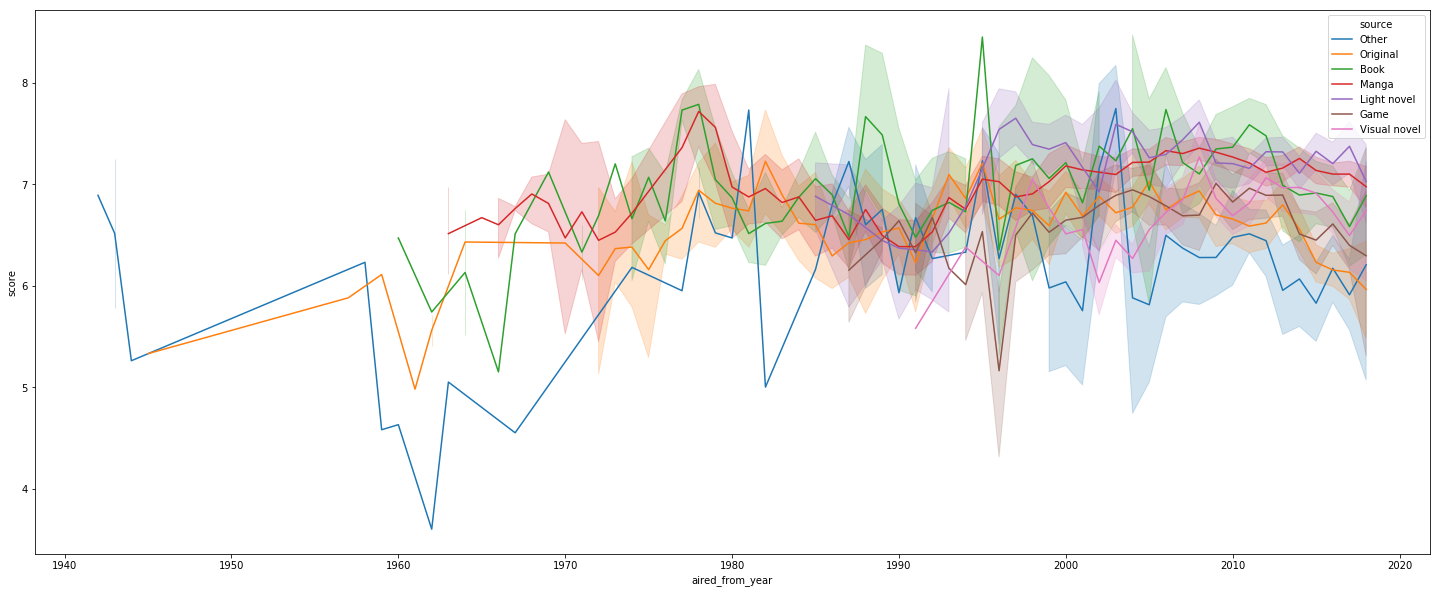

In [7]:
plt.figure(figsize=(25,10))
ax = sns.lineplot(x="aired_from_year", y="score", hue="source", data=df)

Marginally better, but still cluttered. Maybe if we seperate things just a bit...

## Seperation By Decades
Rather than that jumbled up mess, let's do it by decades. Each decade tends to say a lot about the atmosphere at the time.

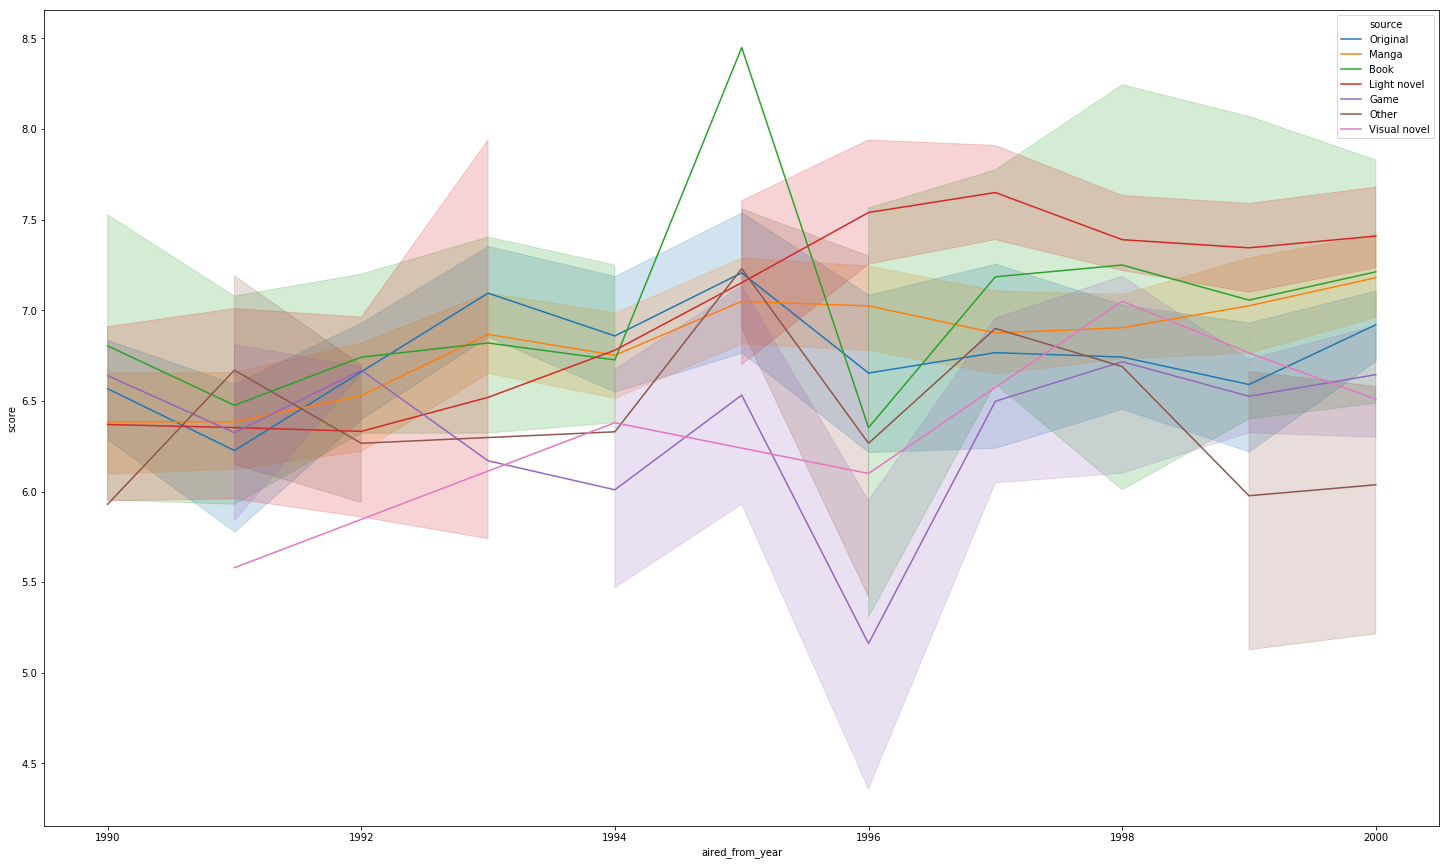

In [8]:
plt.figure(figsize=(25,15))
ax = sns.lineplot(x="aired_from_year", y="score", hue="source", 
                  data=df[(df['aired_from_year'] >= 1990) & (df['aired_from_year'] <= 2000)])

## 1990 - 2000 Observations:
- Game-based anime didn't seem to fare well at the time. 
- Books and light novel reigned supreme, though books had a lot of variation going on.
- I expected Originals to have a higher median score due to the current era. Nostalgia hits like a truck.
- With home consoles becoming a thing, visual novels have begun.
- 1996 had a terrible game adaptation?

Huh, what's with those odd gaps? Looks like there were times where there was only one available source.

In [9]:
df[(df['aired_from_year'] > 1994) & (df['aired_from_year'] < 1996) & (df['source'] == 'Book')]

,anime_id,title,title_english,title_japanese,type,source,score,scored_by,rank,popularity,background,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
354,2559,Romeo no Aoi Sora,Romeo and the Black Brothers,ロミオの青い空,TV,Book,8.45,7943,134.0,2528,Romeo no Aoi Sora is based on the 1941 German ...,Nippon Animation,"Adventure, Drama, Historical, Slice of Life","['""Sora e..."" by Hiroko Kasahara']","['""Si Si Ciao -Romana no Oka de-"" by Hiroko Ka...",23.0,1995.0


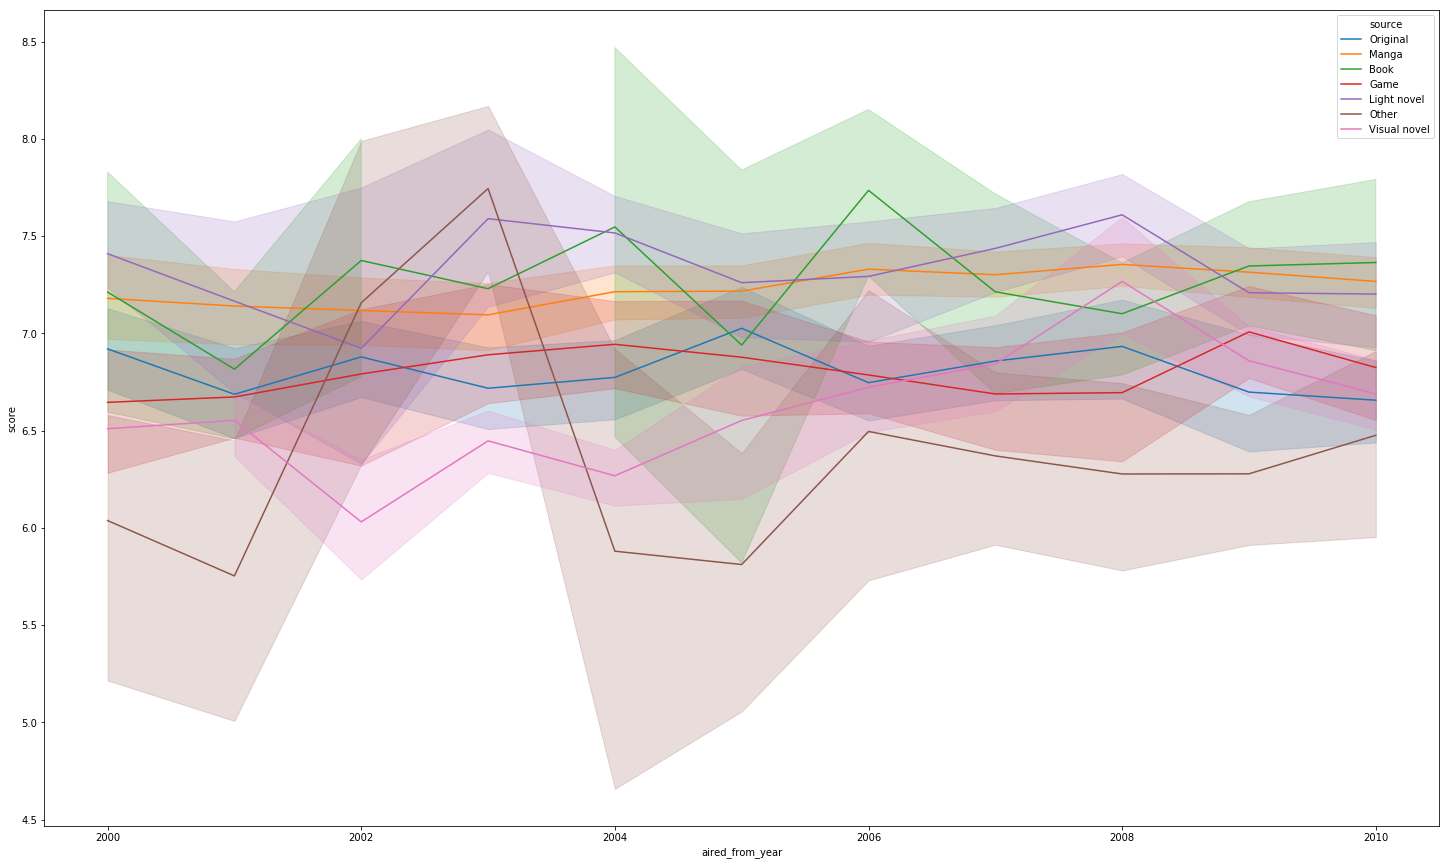

In [10]:
plt.figure(figsize=(25,15))
ax = sns.lineplot(x="aired_from_year", y="score", hue="source", 
                  data=df[(df['aired_from_year'] >= 2000) & (df['aired_from_year'] <= 2010)])

## 2000 - 2010 Observations:
- This was around the time where there were bits and pieces of odd "Other" anime, with creating anime become more accessible. 2004 looks like it was hit pretty hard.
- Books and Light Novel remain consistent. The theatre of the mind seems strong.
- Manga has begun fighting on even grounds.
- What the heck happened with 'Other' at around 2003 and 2040?
- There was a 'Book' at around 2004 that went nuts.

In [14]:
df[(df['aired_from_year'] == 2003) & (df['source'] == 'Other')]

,anime_id,title,title_english,title_japanese,type,source,score,scored_by,rank,popularity,background,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
2425,731,Interstella5555: The 5tory of The 5ecret 5tar ...,NaN,インターステラ5555,Music,Other,8.17,25557,349.0,1751,NaN,Toei Animation,"Adventure, Drama, Music, Sci-Fi","['""One More Time"" by Daft Punk']","['""Aerodynamic (Daft Punk Remix)"" by Daft Punk']",67.0,2003.0
1404,1303,The Animatrix,The Animatrix,アニマトリックス,OVA,Other,7.32,24942,2364.0,1514,The film won the 2003 Annie Award for Best Ani...,"Madhouse, Studio 4°C","Action, Drama, Sci-Fi",[],[],10.0,2003.0


In [15]:
df[(df['aired_from_year'] == 2004) & (df['source'] == 'Other')]

,anime_id,title,title_english,title_japanese,type,source,score,scored_by,rank,popularity,background,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
6035,669,Kujibiki Unbalance,NaN,くじびきアンバランス,OVA,Other,6.17,4363,6869.0,3814,NaN,Palm Studio,"Comedy, Romance, School","['""Kujibiki Unbalance (くじびきアンバランス)"" by UNDER17']","['""Kagayaki Cyalume (かがやきサイリューム)"" by UNDER17']",25.0,2004.0
2019,36765,Scary,NaN,SCARY,Music,Other,3.80,25,11980.0,14002,NaN,pH Studio,"Music, Sci-Fi",[],[],4.0,2004.0
5215,3821,Portable Kuukou,Portable Airport,ポータブル空港,Music,Other,5.72,957,7952.0,7052,NaN,Studio Ghibli,"Sci-Fi, Music, Space",[],[],3.0,2004.0
5209,4689,Kaze no Toori Michi,The Path of Wind,カゼノトオリミチ,Music,Other,6.14,1039,6963.0,6605,NaN,"Studio Ghibli, Ajia-Do",Music,[],[],5.0,2004.0
423,166,Samurai 7,Samurai 7,サムライセブン,TV,Other,7.57,44550,1438.0,973,NaN,Gonzo,"Historical, Mecha, Samurai, Sci-Fi","['""UNLIMITED"" by Nanase Aikawa']","['""Fuhen (普遍)"" by Rin&#039;']",26.0,2004.0


Oh, Instella5555. That's a classic. During 2004, they also tried to cash in on some music-sci-space anime, which... didn't quite make it. There's not a lot of 'Other's out there, so we can expect a lot of skews.

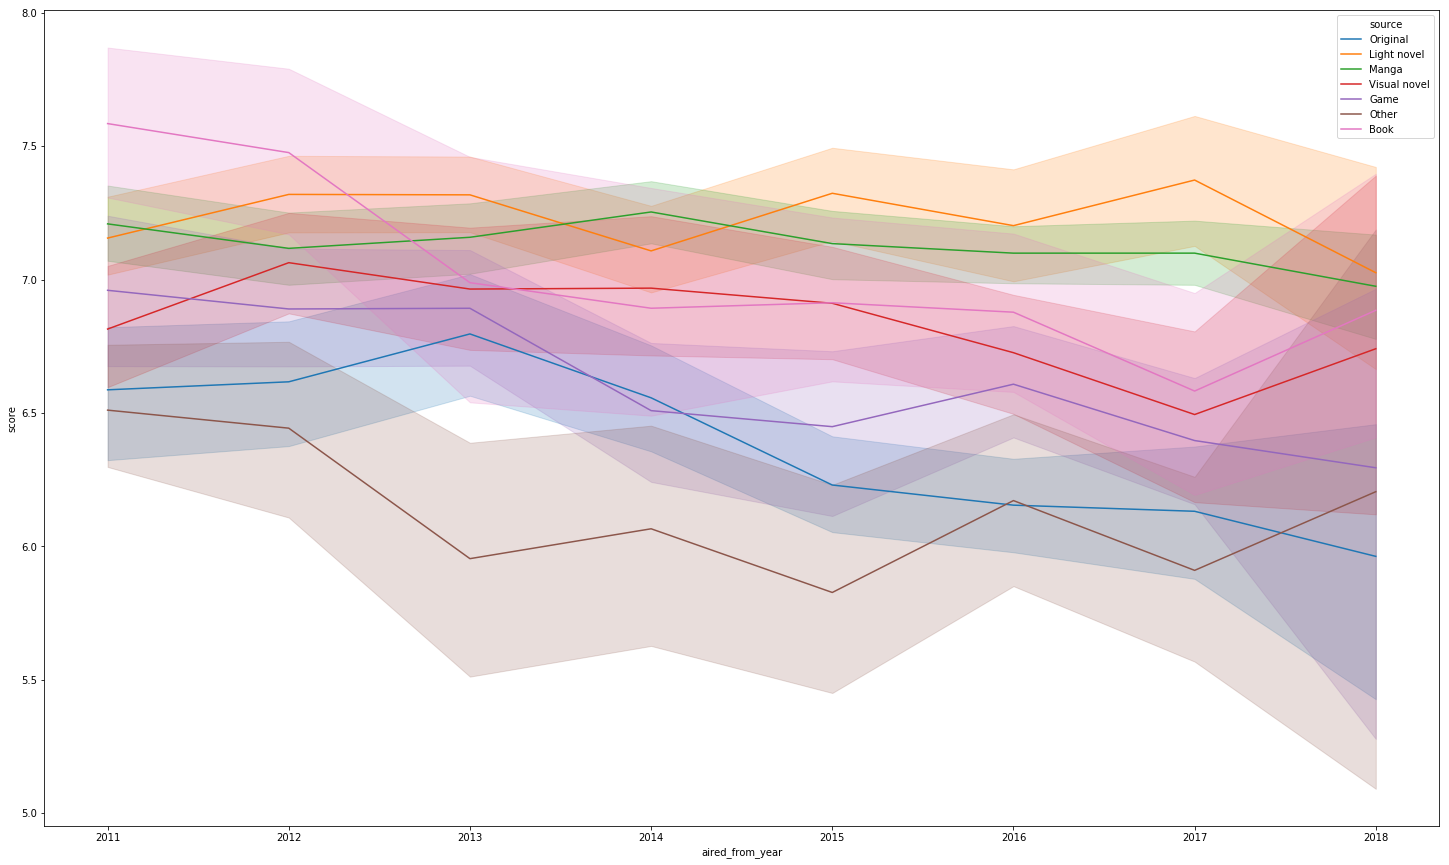

In [12]:
plt.figure(figsize=(25,15))
ax = sns.lineplot(x="aired_from_year", y="score", hue="source", 
                  data=df[df['aired_from_year']> 2010])

In [13]:
pd.set_option('display.max_columns', None)
df[(df['source'] == 'Book') & (df['score'] > 8.0)]

,anime_id,title,title_english,title_japanese,type,source,score,scored_by,rank,popularity,background,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
195,2618,Takarajima,NaN,宝島,TV,Book,8.09,3201,450.0,3959,This is an anime adaptation of the classic nov...,"Madhouse, TMS Entertainment","Adventure, Mystery, Historical, Drama","['""Takarajima"" by Machida Yoshito (町田よしと)']","['""Chiisana Funanori (小さな船乗り)"" by Machida Yosh...",24.0,1978.0
587,302,Mirai Shounen Conan,Future Boy Conan,未来少年コナン,TV,Book,8.13,7754,404.0,2531,NaN,Nippon Animation,"Adventure, Drama, Sci-Fi","['""Ima Chikyuu ga Mezameru (今地球がめざめる)"" by Naoz...","['""Shiawase no Yokan (幸せの予感)"" by Naozuki Kamad...",29.0,1978.0
4273,3014,Ginga Eiyuu Densetsu: Waga Yuku wa Hoshi no Ta...,NaN,銀河英雄伝説: わが征くは星の大海,Movie,Book,8.03,11876,517.0,2661,NaN,"Artland, Madhouse","Action, Military, Sci-Fi, Space","['""Symphony No. 3: I. Kräftig entschieden"" by ...","['""Symphony No. 3: VI. Langsam. Ruhevoll. Empf...",59.0,1988.0
6117,578,Hotaru no Haka,Grave of the Fireflies,火垂るの墓,Movie,Book,8.55,146968,83.0,284,Hotaru no Haka is based on the 1967 semi-autob...,Studio Ghibli,"Drama, Historical","['""Setsuko and Seita"" by Michio Mamiya']","['""Futari"" by Michio Mamiya']",88.0,1988.0
6100,820,Ginga Eiyuu Densetsu,Legend of the Galactic Heroes,銀河英雄伝説,OVA,Book,9.11,29036,6.0,671,Legend of the Galactic heroes was adapted from...,"Artland, Magic Bus","Military, Sci-Fi, Space, Drama","['#1: ""Skies of Love"" by Michiru Akiyoshi (eps...","['#1: ""Hikari no Hashi wo koete"" by Kei Ogura ...",26.0,1988.0
577,512,Majo no Takkyuubin,Kiki&#039;s Delivery Service,魔女の宅急便,Movie,Book,8.29,139857,250.0,340,The film won the 1989 Animage&#039;s Anime Gra...,"Studio Ghibli, Studio Hibari","Adventure, Comedy, Drama, Magic, Romance, Fantasy","['""Rouge no Dengon (ルージュの伝言; Message of Rouge)...","['""I&#039;m Gonna Fly"" by Sydney Forest (Engl...",105.0,1989.0
3884,2150,Tanoshii Muumin Ikka,NaN,楽しいムーミン一家,TV,Book,8.05,5149,495.0,3637,NaN,Telescreen BV,"Adventure, Comedy, Fantasy, Kids, Slice of Life","['#1: ""Yume no sekai e (夢の世界へ)"" by Emiko Shira...","['#1: ""Tooi Akogare (遠いあこがれ)"" by Emiko Shirato...",24.0,1990.0
327,3016,Ginga Eiyuu Densetsu: Arata Naru Tatakai no Ov...,NaN,銀河英雄伝説外伝 新たなる戦いの序曲[オーヴァチュア],Movie,Book,8.17,8547,346.0,2924,NaN,Magic Bus,"Action, Space, Military, Drama, Sci-Fi","['""Der Fliegende Höllander"" by Richard Wagner']",[],90.0,1993.0
354,2559,Romeo no Aoi Sora,Romeo and the Black Brothers,ロミオの青い空,TV,Book,8.45,7943,134.0,2528,Romeo no Aoi Sora is based on the 1941 German ...,Nippon Animation,"Adventure, Drama, Historical, Slice of Life","['""Sora e..."" by Hiroko Kasahara']","['""Si Si Ciao -Romana no Oka de-"" by Hiroko Ka...",23.0,1995.0
3769,2829,Ie Naki Ko Remy,Sans Famille,家なき子レミ,TV,Book,8.04,4401,509.0,3751,NaN,Nippon Animation,"Adventure, Slice of Life, Historical, Drama","['""Ai ni Tsuite"" by Masashi Sada']","['""Shiawase no Yokan"" by Youca']",23.0,1996.0
